
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BigDataWUR/AgML-CY-Bench/blob/main/notebooks/cybench_summary.ipynb)

# CY-Bench dataset summary

Based on a notebook contributed by Ioannis N. Athanasiadis.

## Install packages

In [ ]:
%pip install --quiet plottable pycountry

## Load dataset summary

This dataset summary is produced by running the `cybench/runs/benchmark_summary.py`.

In [ ]:
import pandas as pd
import pycountry

summary_df = pd.read_csv("/AgML/output/dataset_summary.csv")

maize_ds = summary_df[summary_df["Dataset"].str.startswith("maize")].copy()
maize_ds["country_code"] = maize_ds["Dataset"].str[-2:]
wheat_ds = summary_df[summary_df["Dataset"].str.startswith("wheat")].copy()
wheat_ds["country_code"] = wheat_ds["Dataset"].str[-2:]

maize_ds["Country"] = maize_ds["country_code"].apply(lambda x: pycountry.countries.get(alpha_2=x).name)
maize_ds.set_index("Country", inplace=True)
maize_ds.drop(columns=["Dataset", "country_code"], inplace=True)
maize_ds["Labels Count Per Year"] = maize_ds["Labels Count Per Year"].apply(lambda x: [int(p) for p in x.split(" ")])
print(maize_ds.head(40).to_string())

wheat_ds["Country"] = wheat_ds["country_code"].apply(lambda x: pycountry.countries.get(alpha_2=x).name)
wheat_ds.set_index("Country", inplace=True)
wheat_ds.drop(columns=["Dataset", "country_code"], inplace=True)
wheat_ds["Labels Count Per Year"] = wheat_ds["Labels Count Per Year"].apply(lambda x: [int(p) for p in x.split(" ")])
print(wheat_ds.head(40).to_string())

              Min Year-Max Year  Admin Regions Count  Labels Count                                                                                                             Labels Count Per Year
Country                                                                                                                                                                                             
Angola                2004-2017                   17           238                                                  [0, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 0, 0, 0, 0, 0, 0, 0]
Argentina             2003-2023                  298          5582                        [2, 270, 261, 276, 259, 295, 277, 290, 298, 273, 269, 292, 267, 270, 269, 268, 286, 288, 285, 296, 291, 0]
Austria               2004-2020                    9           153                                                                [0, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0]
Belgium        

## Plot summaries

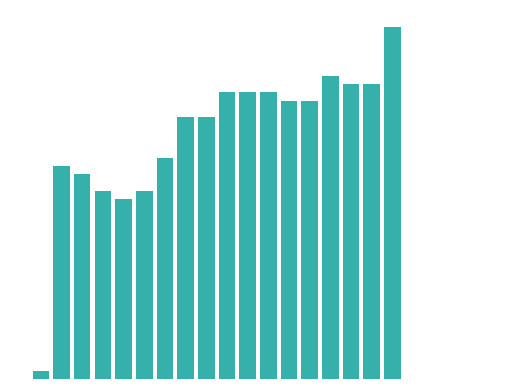

In [55]:
import matplotlib.pyplot as plt
import matplotlib.axes
import typing

def densities_plot(ax: matplotlib.axes.Axes,
                   val: typing.Any,
                   hideAxes = True, startx=2003) -> matplotlib.container.BarContainer:
    bar = ax.bar(*[range(startx, startx+len(val))], val, color = "#35b0ab")
    if(hideAxes):
        ax.set_axis_off()
    return bar

# Test the function above
ax = plt.axes()
bar = densities_plot(ax, wheat_ds["Labels Count Per Year"]["Spain"])
plt.show()

In [56]:
from matplotlib.colors import LinearSegmentedColormap

cmap1 = LinearSegmentedColormap.from_list(
    name="bugw", colors=["#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=256
)

### Maize data summary

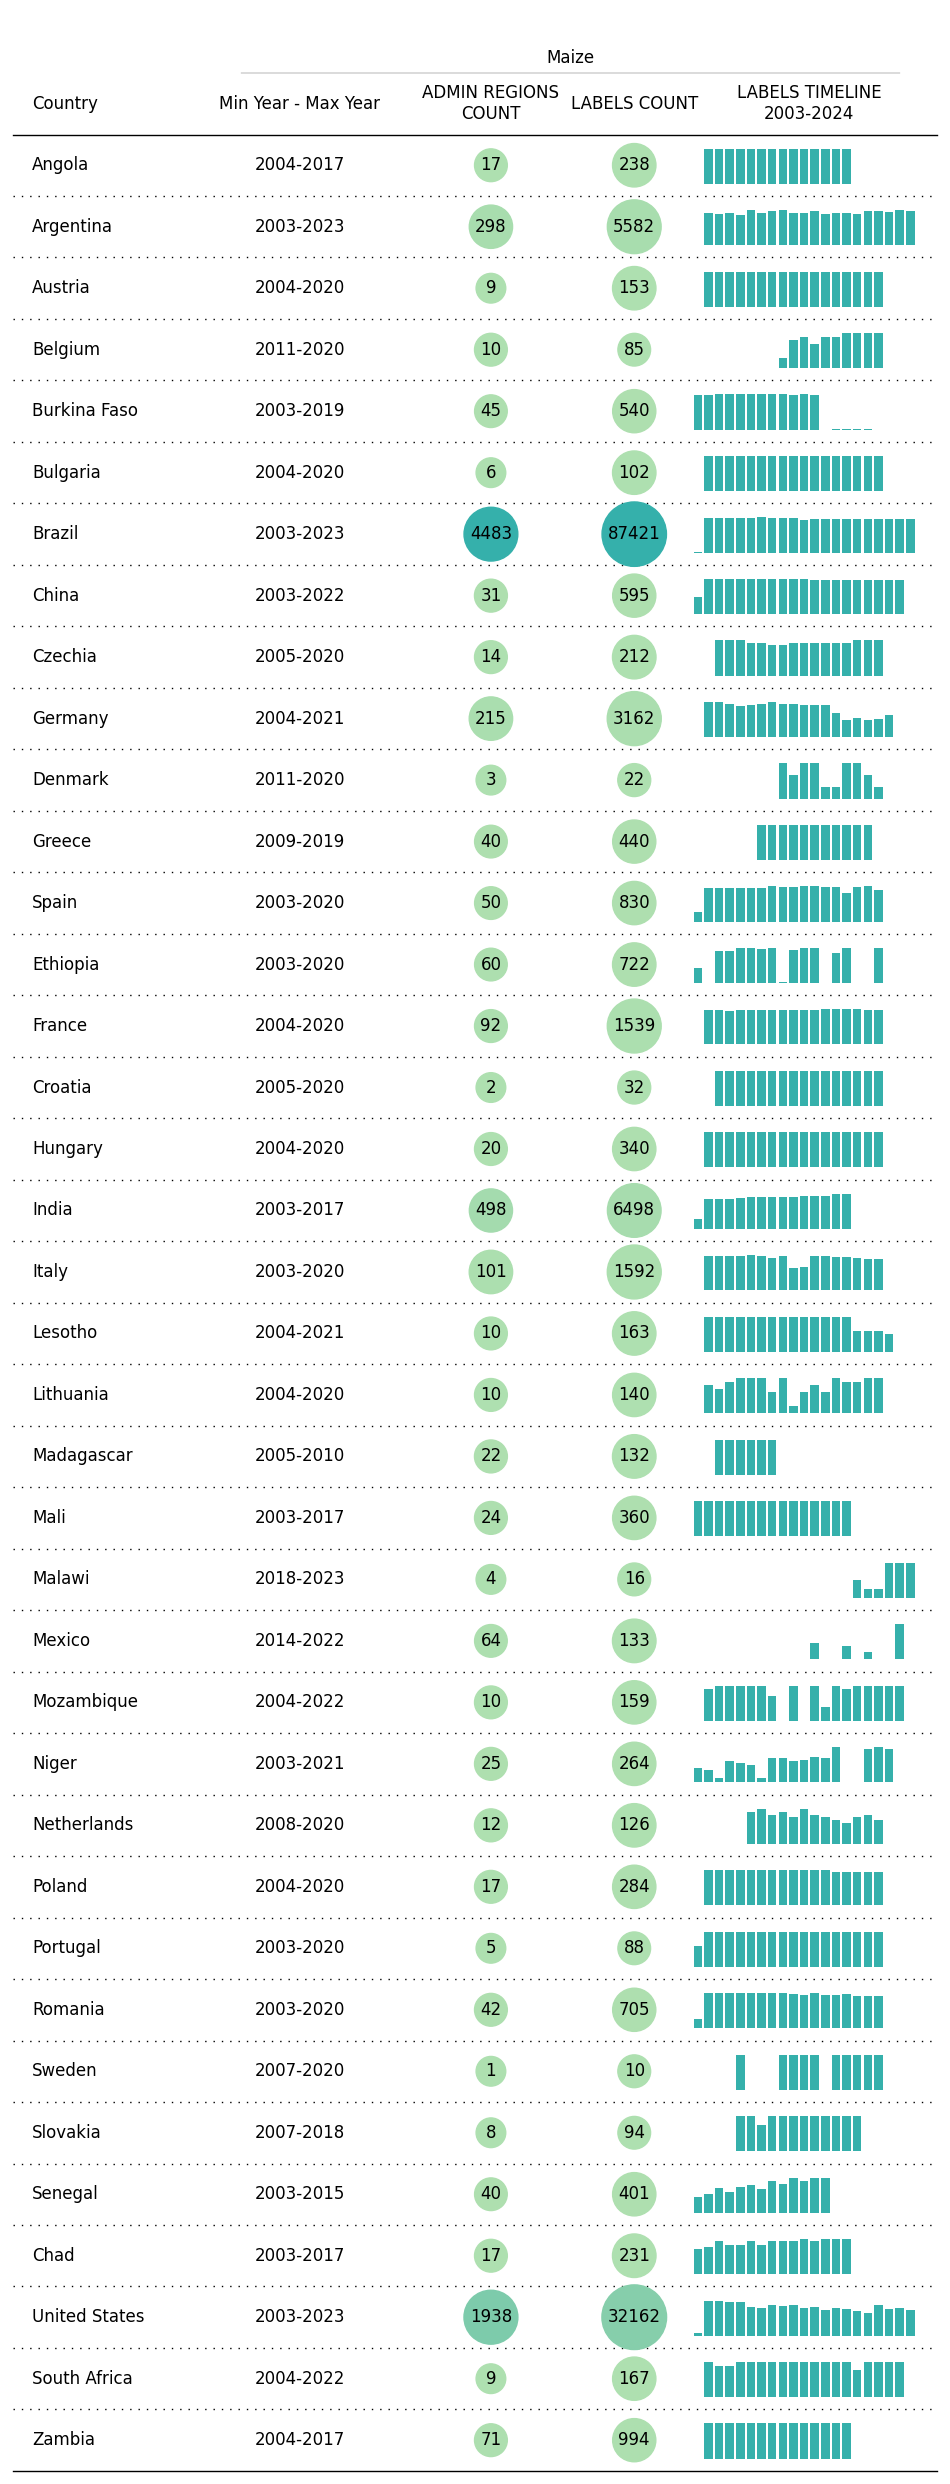

In [58]:
from plottable import ColDef, Table
from plottable.cmap import normed_cmap

fig, ax = plt.subplots(figsize=(12, 32))
crop_label = "Maize"

tab = Table(
            maize_ds,
            columns=["Min Year-Max Year", "Admin Regions Count",
                     "Labels Count", "Labels Count Per Year"],
            column_definitions=[
                ColDef(name="Country", title ="Country",
                        textprops={"ha": "left"},
                        width=1.5,
                       ),

                ColDef(name="Admin Regions Count",
                       title="ADMIN REGIONS\nCOUNT",
                       width=1.5,
                       textprops={"ha": "center",
                                  "bbox": {"boxstyle": "circle", "pad": 0.35},},
                       cmap=normed_cmap(maize_ds['Admin Regions Count'], cmap=cmap1, num_stds=5),
                       group=crop_label),

                ColDef(name="Labels Count",
                       title="LABELS COUNT",
                       width=0.75,
                       textprops={"ha": "center",
                                  "bbox": {"boxstyle": "circle", "pad": 0.35},},
                       cmap=normed_cmap(maize_ds['Labels Count'], cmap=cmap1, num_stds=5),
                       group=crop_label),

                ColDef(name="Min Year-Max Year",
                       title="Min Year - Max Year",
                       width=1.5,
                       group=crop_label),

                ColDef("Labels Count Per Year", title="LABELS TIMELINE\n2003-2024", width=2,
                       group= crop_label,
                       plot_fn=densities_plot,
                       textprops={"ha": "center"}),
                ],
            row_dividers=True,
            col_label_divider=True,
            footer_divider=True,
            textprops={"fontsize": 12, "font":"sans serif", "ha":"center"},
            row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
            col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
            column_border_kw={"linewidth": 1, "linestyle": "-"},
        )

plt.show()

### Wheat data summary

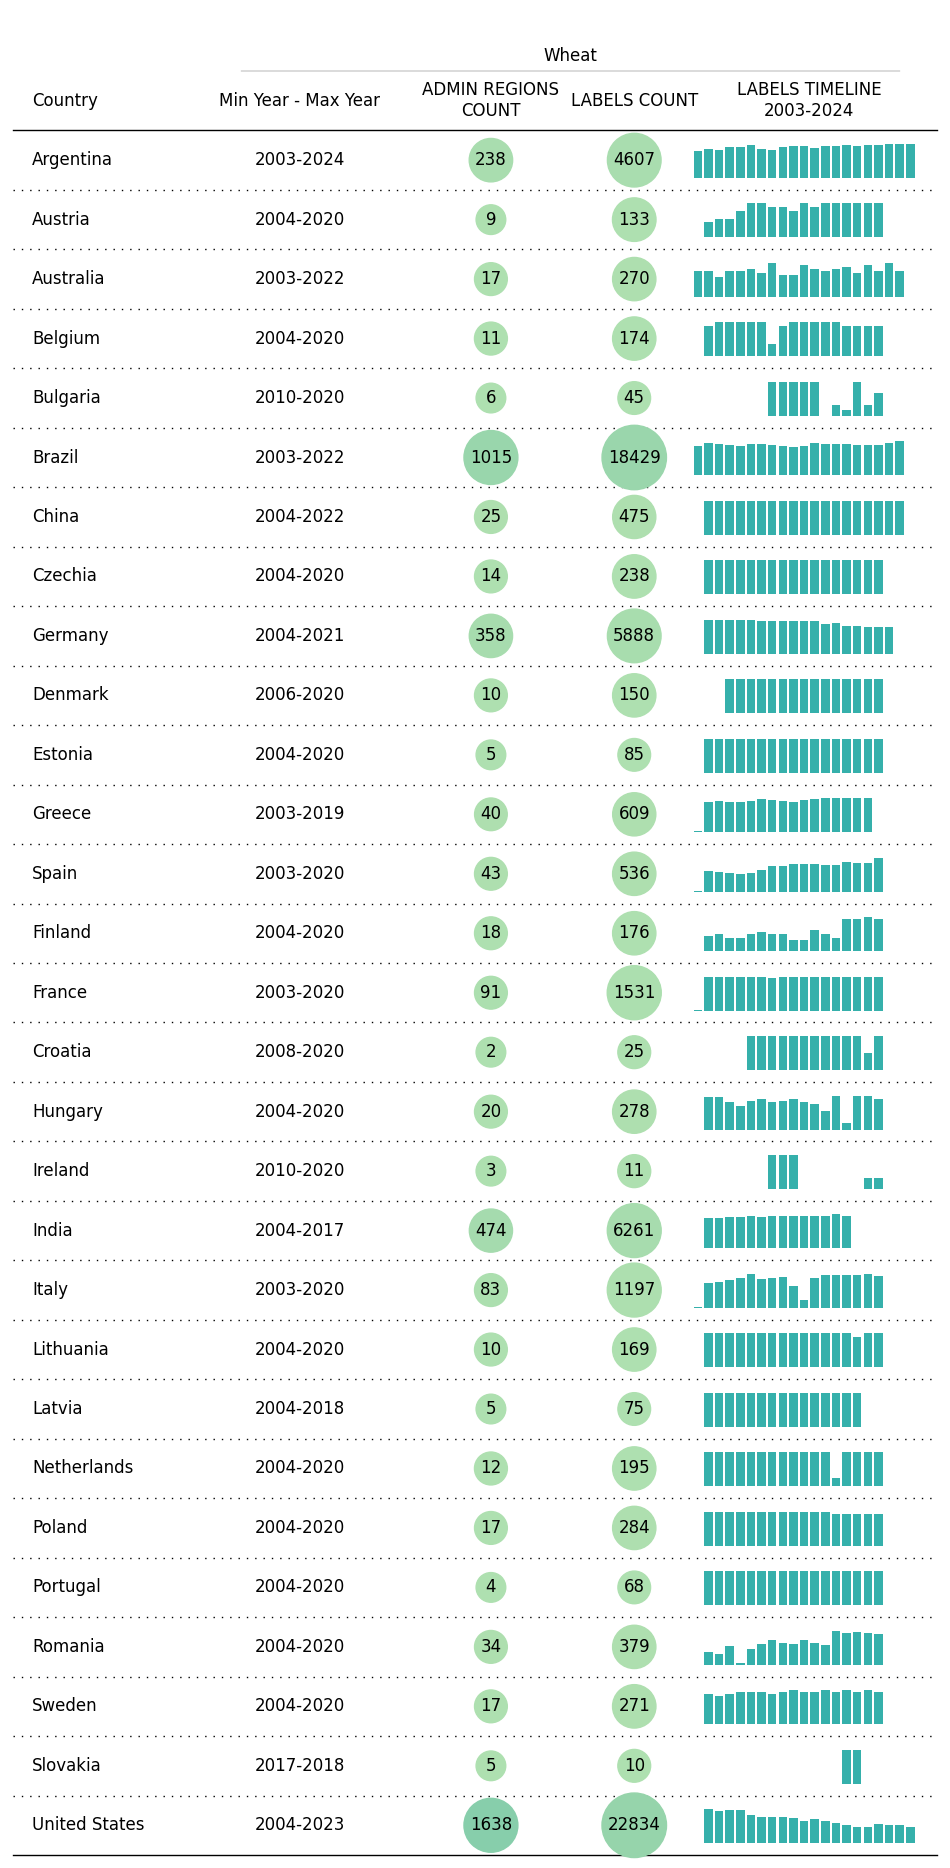

In [59]:
from plottable import ColDef, Table
from plottable.cmap import normed_cmap

fig, ax = plt.subplots(figsize=(12, 24))
crop_label = "Wheat"

tab = Table(
            wheat_ds,
            columns=["Min Year-Max Year", "Admin Regions Count",
                     "Labels Count", "Labels Count Per Year"],
            column_definitions=[
                ColDef(name="Country", title ="Country",
                        textprops={"ha": "left"},
                        width=1.5,
                       ),

                ColDef(name="Admin Regions Count",
                       title="ADMIN REGIONS\nCOUNT",
                       width=1.5,
                       textprops={"ha": "center",
                                  "bbox": {"boxstyle": "circle", "pad": 0.35},
                                 },
                       cmap=normed_cmap(maize_ds['Admin Regions Count'], cmap=cmap1, num_stds=5),
                       group=crop_label),

                ColDef(name="Labels Count",
                       title="LABELS COUNT",
                       width=0.75,
                       textprops={"ha": "center",
                                  "bbox": {"boxstyle": "circle", "pad": 0.35},},
                       cmap=normed_cmap(maize_ds['Labels Count'], cmap=cmap1, num_stds=5),
                       group=crop_label),

                ColDef(name="Min Year-Max Year",
                       title="Min Year - Max Year",
                       width=1.5,
                       group=crop_label),

                ColDef("Labels Count Per Year", title="LABELS TIMELINE\n2003-2024", width=2,
                       group= crop_label,
                       plot_fn=densities_plot,
                       textprops={"ha": "center"}),
                ],
            row_dividers=True,
            col_label_divider=True,
            footer_divider=True,
            textprops={"fontsize": 12, "font":"sans serif", "ha":"center"},
            row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
            col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
            column_border_kw={"linewidth": 1, "linestyle": "-"},
        )

plt.show()